In [1]:
# parameter
β = 0.9                        # discount factor

# set grid
nw = 1001                      # number of grid points
wgrid = collect(range(0.0,stop=1.0,length=nw)) # evenly spaced grid points from 0.0 to 1.0
wgrid[1] = wgrid[2]/10         # avoid w=c=0

# analytical solution
B = 1/(1-β)
A = (β*B*log(β*B)-(1+β*B)*log(1+β*B))/(1-β)
vvec = A .+ B*log.(wgrid)      # value function
wvec = β*wgrid                 # policy function

1001-element Vector{Float64}:
 9.0e-5
 0.0009000000000000001
 0.0018000000000000002
 0.0027
 0.0036000000000000003
 0.0045000000000000005
 0.0054
 0.0063
 0.007200000000000001
 0.0081
 0.009000000000000001
 0.009899999999999999
 0.0108
 ⋮
 0.8901
 0.891
 0.8919
 0.8928
 0.8937
 0.8946000000000001
 0.8955
 0.8964
 0.8973
 0.8982
 0.8991
 0.9

In [3]:
# 0. construct the current utility
umat = zeros(nw,nw)
for iw in 1:nw # today's wealth
    for jw in 1:nw # tomorrow's wealth
        wnow = wgrid[iw]  # W
        wp = wgrid[jw]    # W'
        cnow = wnow-wp      # c=W-W'
        if cnow>0
            # if c >0, the utility value is log(c)
            umat[iw,jw] = log(cnow)
        else
            # if c<=0, the utility value is set so that the index j is never chosen. 
            umat[iw,jw] = -1e+10 # -10000000000 (i.e., ten zeros)
        end
    end
end

# NOTE: to avoid log(0) when wnow=wp=0
umat[1,1] = log(wgrid[1])

-9.210340371976182

In [4]:
wvec0 = zeros(nw)     # policy function
vvec0 = zeros(nw)     # old value function
vvec1 = zeros(nw)     # new value function

diff = 1e+4
iter = 0

while diff>1e-4 # while loop until the condition diff>1e-4 met

    for iw in 1:nw # for each index of the current period, iw=0,...,nw-1    
        # 1. find the index of the next period jw so as to maximize the value function
        jw = argmax(umat[iw,:] + β*vvec0)
        vvec1[iw] = umat[iw,jw] + β*vvec0[jw]   # V*(W)
        wvec0[iw] = wgrid[jw]                   # W'(W)
    end

    diff  = maximum(abs.(vvec1-vvec0)) # the condition for convergence
    iter  = iter + 1
    println([iter,diff])
    # 2. update the value function
    vvec0 = copy(vvec1)
    
end

[1.0, 9.210340371976182]
[2.0, 8.289306334778564]
[3.0, 7.460375701300709]
[4.0, 6.7143381311706385]
[5.0, 6.042904318053573]
[6.0, 5.43861388624822]
[7.0, 4.894752497623401]
[8.0, 4.405277247861058]
[9.0, 3.964749523074957]
[10.0, 3.568274570767464]
[11.0, 3.211447113690717]
[12.0, 2.8903024023216446]
[13.0, 2.6012721620894865]
[14.0, 2.3411449458805365]
[15.0, 2.1070304512924807]
[16.0, 1.8963274061632376]
[17.0, 1.7066946655469195]
[18.0, 1.5360251989922347]
[19.0, 1.3824226790930112]
[20.0, 1.244180411183713]
[21.0, 1.1197623700653452]
[22.0, 1.007786133058815]
[23.0, 0.9070075197529377]
[24.0, 0.8163067677776468]
[25.0, 0.7346760909998835]
[26.0, 0.661208481899898]
[27.0, 0.5950876337099089]
[28.0, 0.5355788703389237]
[29.0, 0.4820209833050342]
[30.0, 0.43381888497454213]
[31.0, 0.3904369964770922]
[32.0, 0.3513932968293858]
[33.0, 0.3162539671464515]
[34.0, 0.28462857043180634]
[35.0, 0.2561657133886257]
[36.0, 0.2305491420497674]
[37.0, 0.20749422784479066]
[38.0, 0.186744805060

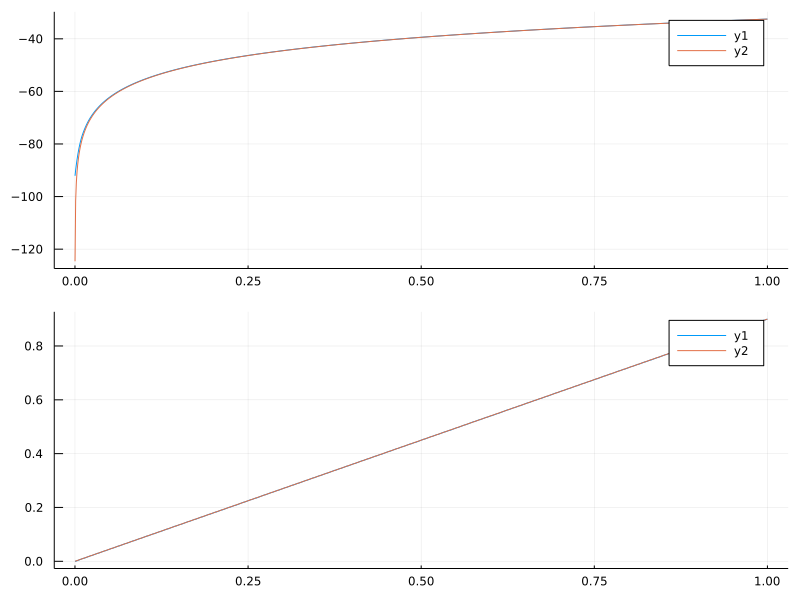

In [5]:
using Plots
plot(
    plot([wgrid wgrid],[vvec0 vvec]),
    plot([wgrid wgrid],[wvec0 wvec]),
    layout=(2,1),size=(800,600))